In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

In [4]:
grad_rate_15_df = pd.read_csv("Resources/2015_grad_rates_revised.csv")
grad_rate_16_df = pd.read_csv("Resources/2016_grad_rates_revised.csv")
grad_rate_17_df = pd.read_csv("Resources/2017_grad_rates_revised.csv")
grad_rate_18_df = pd.read_csv("Resources/2018_grad_rates_revised.csv")
grad_rate_19_df = pd.read_csv("Resources/2019_grad_rates_revised.csv")
grad_rate_15_df.head()

,Corp Id,CORPORATION NAME,Cohort N,Grad N,State Grad Rate,Non-Waiver Grad N,State Non-Waiver Grad Rate
0,15,Adams Central Community Schools,95,90,94.70%,87,91.60%
1,5265,Alexandria Community School Corporation,112,98,87.50%,97,86.60%
2,5275,Anderson Community School Corporation,394,353,89.60%,277,70.30%
3,5470,Argos Community Schools,46,34,73.90%,34,73.90%
4,2435,Attica Consolidated School Corporation,68,67,98.50%,64,94.10%


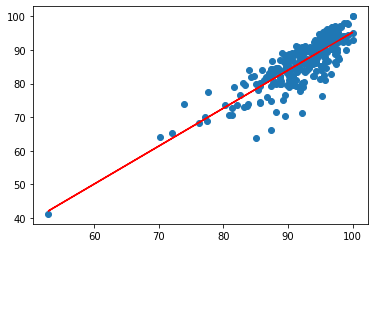

The correlation coefficient between poverty rate and graduation rate is0.84


In [5]:
# 2015 poverty rate vs 2015 graduation rate
waiver_grad_15 = grad_rate_15_df["State Grad Rate"].str.replace('%','').astype(np.float64)
non_grad_15 = grad_rate_15_df["State Non-Waiver Grad Rate"].str.replace('%','').astype(np.float64)
# line regression for 2015 pov rate and grad rate.
(slope, intercept, rvalue, pvalue, stderr) = linregress(waiver_grad_15,non_grad_15)
regress_values = waiver_grad_15 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot poverty rate vs. graduation rate.
plt.scatter(waiver_grad_15,non_grad_15)
plt.plot(waiver_grad_15,regress_values,"r-")
plt.annotate(line_eq,(60,10),fontsize=15,color="red")
plt.show()
print(f"The correlation coefficient between poverty rate and graduation rate is{round(st.pearsonr(waiver_grad_15,non_grad_15)[0],2)}")
      